In [34]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics.pairwise import distance_metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, RocCurveDisplay, auc

from joblib import dump
from imblearn.over_sampling import SMOTE



In [35]:
data = pd.read_csv('../../../DATA/Concatination_of_ters/Without_Индекс стоимости жизни/classes.csv').dropna()


In [36]:
X, y = data.drop('Средняя численность работников, включая внешних совместителей',
                 axis=1), data['Средняя численность работников, включая внешних совместителей']
X_balanced, y_balanced = SMOTE().fit_resample(X, y)


In [37]:
X_balanced['Средняя численность работников, включая внешних совместителей'] = y_balanced


In [38]:
data_smoted = X_balanced

In [39]:
X_train_smoted, X_test_smoted, y_train_smoted, y_test_smoted = train_test_split(data_smoted.drop('Средняя численность работников, включая внешних совместителей', axis=1),
                                                    data_smoted['Средняя численность работников, включая внешних совместителей'], test_size=0.5, random_state=42)


# Recall

In [40]:
forest = GridSearchCV(RandomForestClassifier(),
                                       {'criterion': ['gini', 'entropy', 'log_loss'],
                                        'max_depth': np.arange(5, 20, 1)
                                        },
                                       scoring='recall',
                                       cv=4,
                                       n_jobs=4,
                                       ).fit(X_train_smoted, y_train_smoted)
forest.best_params_


{'criterion': 'entropy', 'max_depth': 18}

In [41]:
y_predicted = forest.predict(X_test_smoted)

In [42]:
print(confusion_matrix(y_test_smoted, y_predicted))


[[30 11]
 [14 33]]


In [43]:
print(classification_report(y_test_smoted, y_predicted))


              precision    recall  f1-score   support

       False       0.68      0.73      0.71        41
        True       0.75      0.70      0.73        47

    accuracy                           0.72        88
   macro avg       0.72      0.72      0.72        88
weighted avg       0.72      0.72      0.72        88



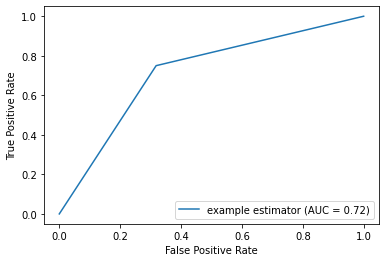

In [44]:
fpr, tpr, thresholds = roc_curve(y_predicted, y_test_smoted)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(
    fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()


# F1

In [45]:
forest = GridSearchCV(RandomForestClassifier(),
                                       {'criterion': ['gini', 'entropy', 'log_loss'],
                                        'max_depth': np.arange(5, 20, 1)
                                        },
                                       scoring='f1',
                                       cv=4,
                                       n_jobs=4,
                                       ).fit(X_train_smoted, y_train_smoted)
forest.best_params_


{'criterion': 'entropy', 'max_depth': 12}

In [46]:
y_predicted = forest.predict(X_test_smoted)

In [47]:
print(confusion_matrix(y_test_smoted, y_predicted))


[[34  7]
 [16 31]]


In [48]:
print(classification_report(y_test_smoted, y_predicted))


              precision    recall  f1-score   support

       False       0.68      0.83      0.75        41
        True       0.82      0.66      0.73        47

    accuracy                           0.74        88
   macro avg       0.75      0.74      0.74        88
weighted avg       0.75      0.74      0.74        88



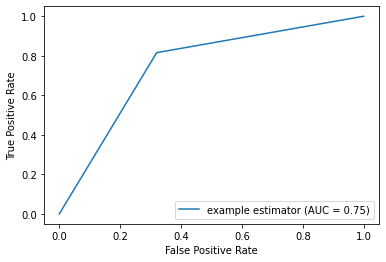

In [49]:
fpr, tpr, thresholds = roc_curve(y_predicted, y_test_smoted)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(
    fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
